In [42]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import seaborn as sns

print(tf.__version__)

%matplotlib inline

2.0.0-alpha0


In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
print("Training Examples: {}".format(train_images.shape))
print("Testing Examples: {}".format(test_images.shape))

Training Examples: (60000, 28, 28)
Testing Examples: (10000, 28, 28)


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

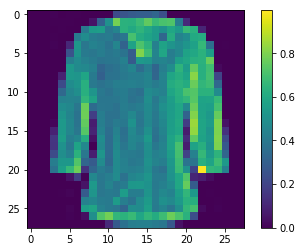

In [117]:
plt.imshow(test_images[4])
plt.colorbar()
plt.show()

In [6]:
## Scaling

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

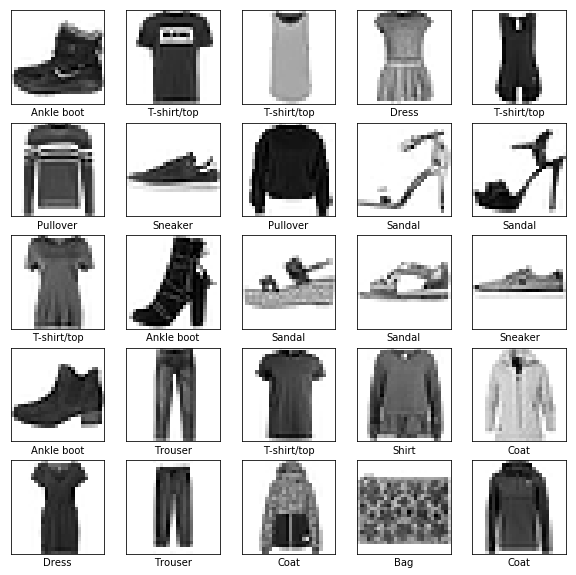

In [8]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
## Build the model

## Vanilla Neural Network

In [23]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.GaussianDropout(0.2))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(train_images, train_labels, epochs=50, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 4s 77us/sample - loss: 0.5807 - accuracy: 0.7914 - val_loss: 0.4256 - val_accuracy: 0.8441
Epoch 2/50
48000/48000 [==============================] - 4s 87us/sample - loss: 0.4281 - accuracy: 0.8456 - val_loss: 0.3814 - val_accuracy: 0.8638
Epoch 3/50
48000/48000 [==============================] - 4s 92us/sample - loss: 0.3914 - accuracy: 0.8580 - val_loss: 0.3891 - val_accuracy: 0.8555
Epoch 4/50
48000/48000 [==============================] - 4s 80us/sample - loss: 0.3698 - accuracy: 0.8632 - val_loss: 0.3440 - val_accuracy: 0.8727
Epoch 5/50
48000/48000 [==============================] - 4s 78us/sample - loss: 0.3521 - accuracy: 0.8706 - val_loss: 0.3452 - val_accuracy: 0.8752
Epoch 6/50
48000/48000 [==============================] - 3s 71us/sample - loss: 0.3382 - accuracy: 0.8741 - val_loss: 0.3415 - val_accuracy: 0.8786
Epoch 7/50
48000/48000 [==============================] 

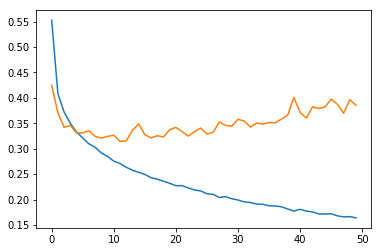

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.3928 - accuracy: 0.8888
Test accuracy: 0.8888


In [27]:
predictions = model.predict(test_images)

In [37]:
np.argmax(predictions[0])

9

In [36]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [116]:
class_names[test_labels[4]]

'Shirt'

Actual: Ankle boot
Predicted: Ankle boot


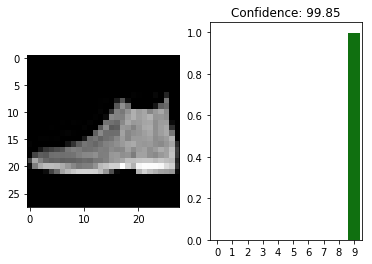

Actual: Pullover
Predicted: Pullover


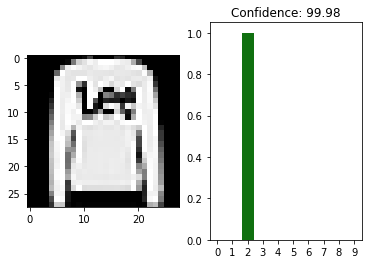

Actual: Trouser
Predicted: Trouser


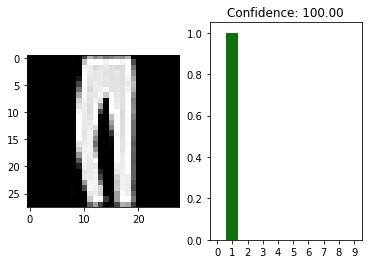

Actual: Trouser
Predicted: Trouser


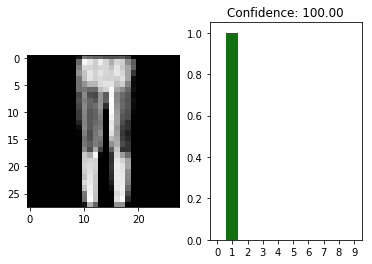

Actual: Shirt
Predicted: T-shirt/top


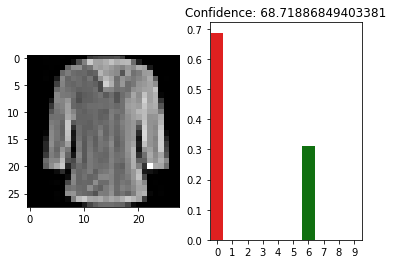

Actual: Trouser
Predicted: Trouser


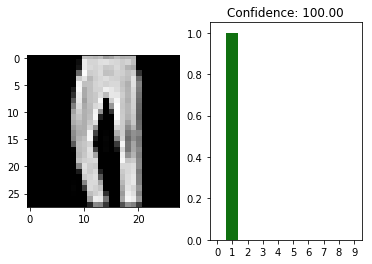

Actual: Coat
Predicted: Coat


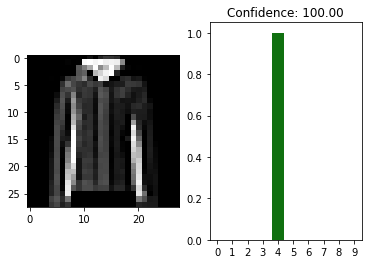

Actual: Shirt
Predicted: Shirt


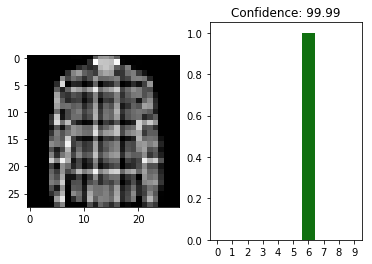

Actual: Sandal
Predicted: Sandal


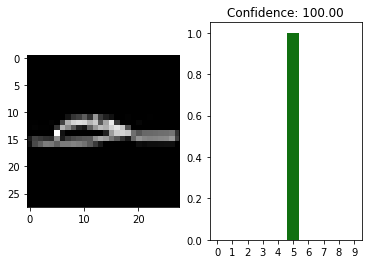

Actual: Sneaker
Predicted: Sneaker


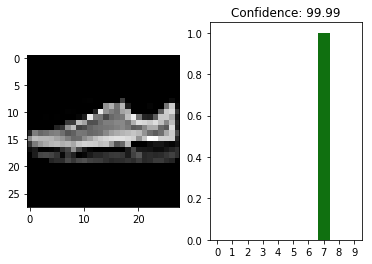

In [119]:
for i in range(10):
    fig, ax  = plt.subplots(ncols=2)
    print("Actual: {}".format(class_names[test_labels[i]]))
    print("Predicted: {}".format(class_names[np.argmax(predictions[i])]))
    ax[0].imshow(test_images[i], cmap=plt.cm.gray)
    if np.argmax(predictions[i]) == test_labels[i]:
        c_map = ['red'] * 10
        c_map[test_labels[i]] = 'green'
        sns.barplot(x=list(range(10)), y=predictions[i], palette=c_map, ax=ax[1])
        plt.title('Confidence: {:0.2f}'.format(np.max(predictions[i]) * 100))
    else:
        c_map = ['red'] * 10
        c_map[test_labels[i]] = 'green'
        sns.barplot(x=list(range(10)), y=predictions[i], palette=c_map, ax=ax[1])
        plt.title('Confidence: {}'.format(np.max(predictions[i]) * 100))
    plt.show()

In [82]:
#! Ends here